<a href="https://colab.research.google.com/github/Jammyeong/MachineLearningClass/blob/main/5thWeek/Tugas_ML_5_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [2]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/smt akhir/ml/netflix_titles.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Feature Engineering
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna('Unknown')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day
df['listed_in_main'] = df['listed_in'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else 'Unknown')

# Statistik deskriptif dan missing value info
missing_values = df.isnull().sum()
summary = df.describe(include='all')

In [9]:
# Lanjutan setelah membersihkan warning dan feature engineering
df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Hapus kolom yang tidak dibutuhkan untuk prediksi
drop_cols = ['show_id', 'title', 'type', 'description', 'date_added', 'listed_in']
df_model = df.drop(columns=drop_cols)

# Encode kategorikal
le = LabelEncoder()
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = le.fit_transform(df_model[col])

In [10]:
# Pisahkan fitur dan target
X = df_model.drop(columns='is_movie')
y = df_model['is_movie']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling (opsional, tapi aman dilakukan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Model klasifikasi
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

In [12]:
# Evaluasi model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Cetak hasil evaluasi
print("=== EVALUASI MODEL ===")
print(f"Akurasi     : {acc:.3f}")
print(f"Presisi     : {prec:.3f}")
print(f"Recall      : {rec:.3f}")
print(f"F1 Score    : {f1:.3f}")
print(f"AUC         : {auc:.3f}")

=== EVALUASI MODEL ===
Akurasi     : 0.991
Presisi     : 0.990
Recall      : 0.997
F1 Score    : 0.993
AUC         : 1.000


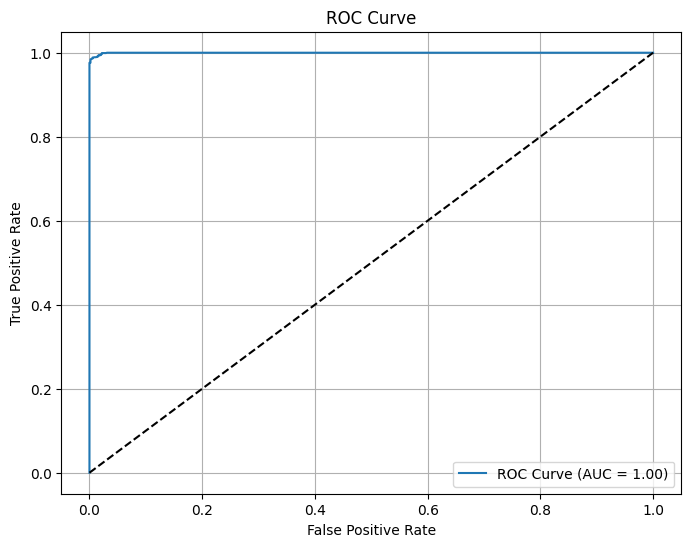

In [13]:
# Visualisasi ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
df_director = df[df['director'] != 'Unknown'].copy()
df_director['director'] = df_director['director'].str.split(', ')
df_director = df_director.explode('director')
top_directors = df_director['director'].value_counts().head(10)

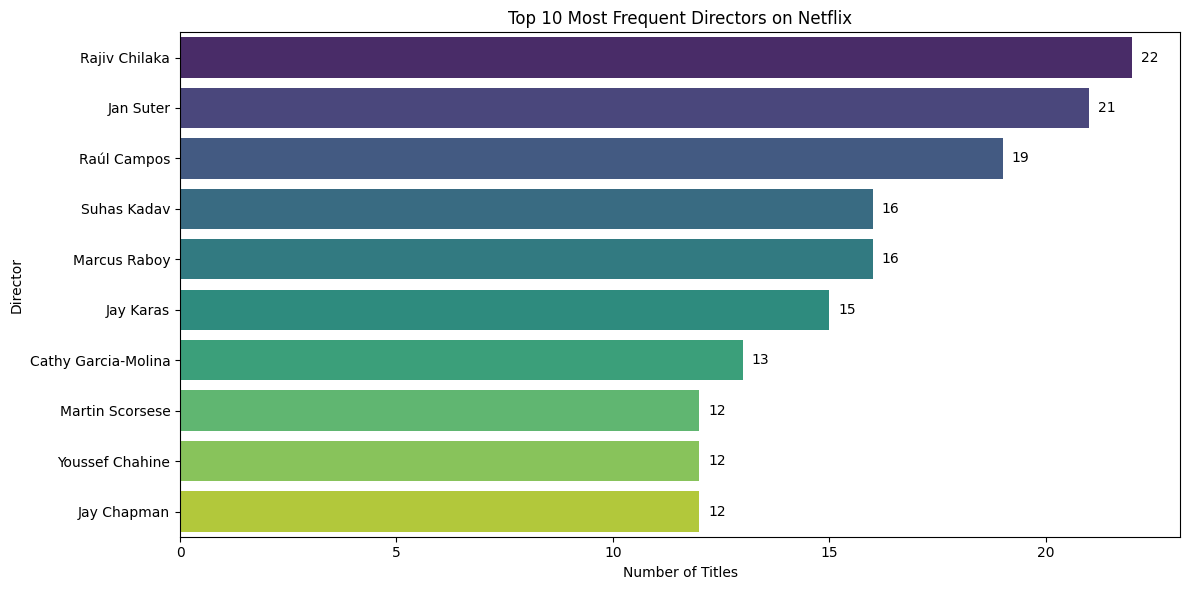

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_directors.values,
    y=top_directors.index,
    hue=top_directors.index,
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title("Top 10 Most Frequent Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")

# Tambahkan jumlah di ujung bar
for i, v in enumerate(top_directors.values):
    plt.text(v + 0.2, i, str(v), color='black', va='center', fontweight='normal')

plt.tight_layout()
plt.show()

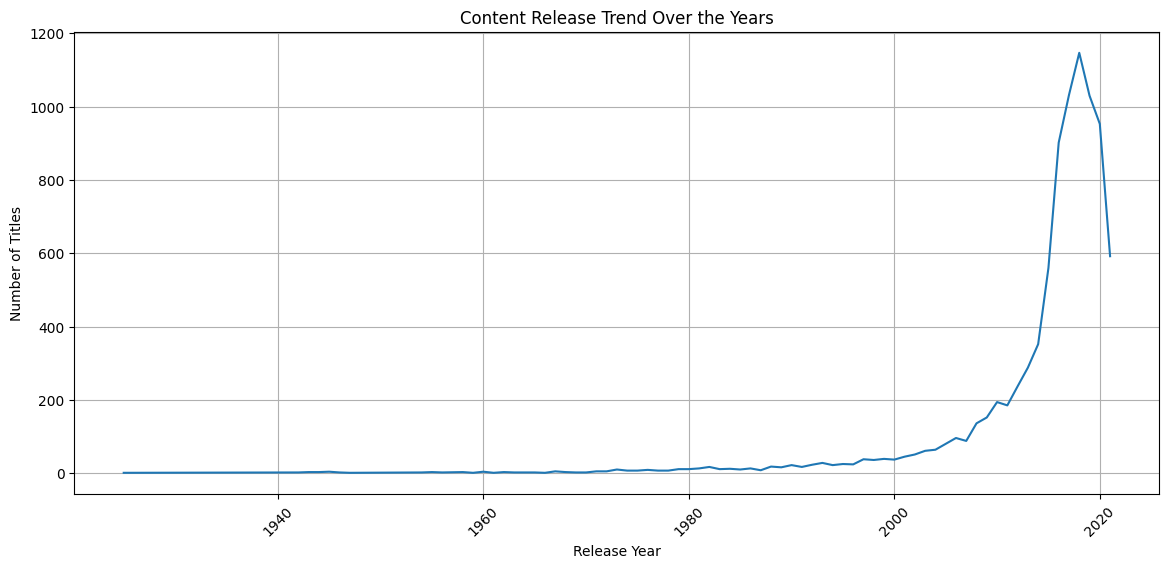

Tahun dengan konten terbanyak: 2018 (1147 judul)


In [17]:
year_counts = df['release_year'].value_counts().sort_index(ascending=True)

plt.figure(figsize=(14, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title("Content Release Trend Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print(f"Tahun dengan konten terbanyak: {year_counts.idxmax()} ({year_counts.max()} judul)")

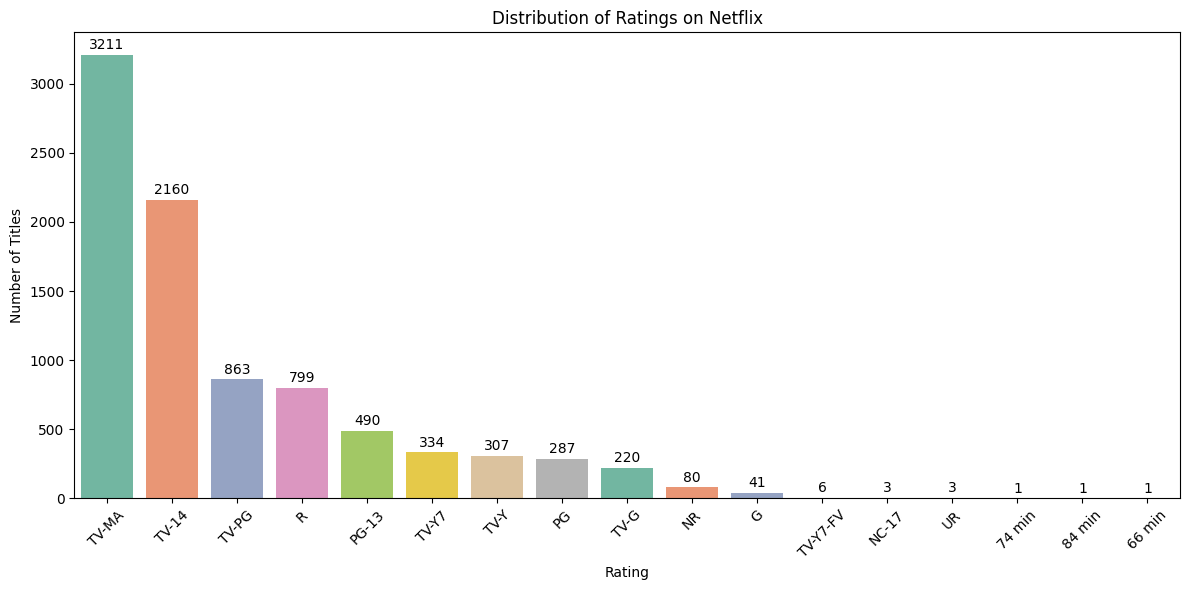

In [18]:
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x=rating_counts.index,
    y=rating_counts.values,
    hue=rating_counts.index,
    palette="Set2",
    dodge=False,
    legend=False
)
plt.title("Distribution of Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)

# Tambahkan jumlah
for i, v in enumerate(rating_counts.values):
    plt.text(i, v + 40, str(v), color='black', ha='center', fontweight='normal')

plt.tight_layout()
plt.show()

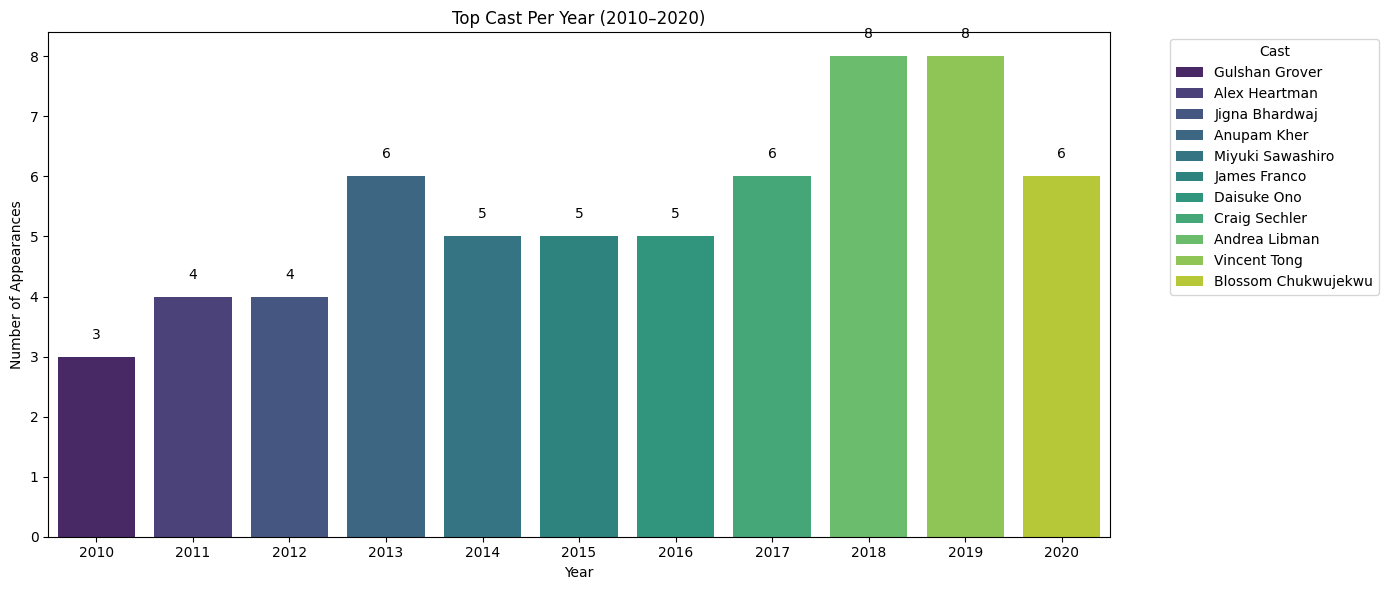

In [19]:
# Pastikan df_2010s sudah didefinisikan
df_2010s = df[(df['release_year'] >= 2010) & (df['release_year'] <= 2020)]

# Siapkan data cast (tanpa Unknown)
df_cast = df_2010s[df_2010s['cast'] != 'Unknown'].copy()
df_cast['cast'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('cast')

# Ambil top 1 cast per tahun
top_cast_per_year = (
    df_cast.groupby(['release_year', 'cast'])
    .size()
    .reset_index(name='count')
    .sort_values(['release_year', 'count'], ascending=[True, False])
    .groupby('release_year')
    .head(1)
)

# Visualisasi
plt.figure(figsize=(14, 6))
sns.barplot(
    x='release_year',
    y='count',
    hue='cast',
    data=top_cast_per_year,
    dodge=False,
    palette='viridis'
)

# Tambahkan label jumlah di atas bar
for i, row in top_cast_per_year.iterrows():
    plt.text(
        x=row['release_year'] - 2010,
        y=row['count'] + 0.3,
        s=str(row['count']),
        ha='center',
        fontsize=10
    )

plt.title("Top Cast Per Year (2010–2020)")
plt.xlabel("Year")
plt.ylabel("Number of Appearances")
plt.legend(title="Cast", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

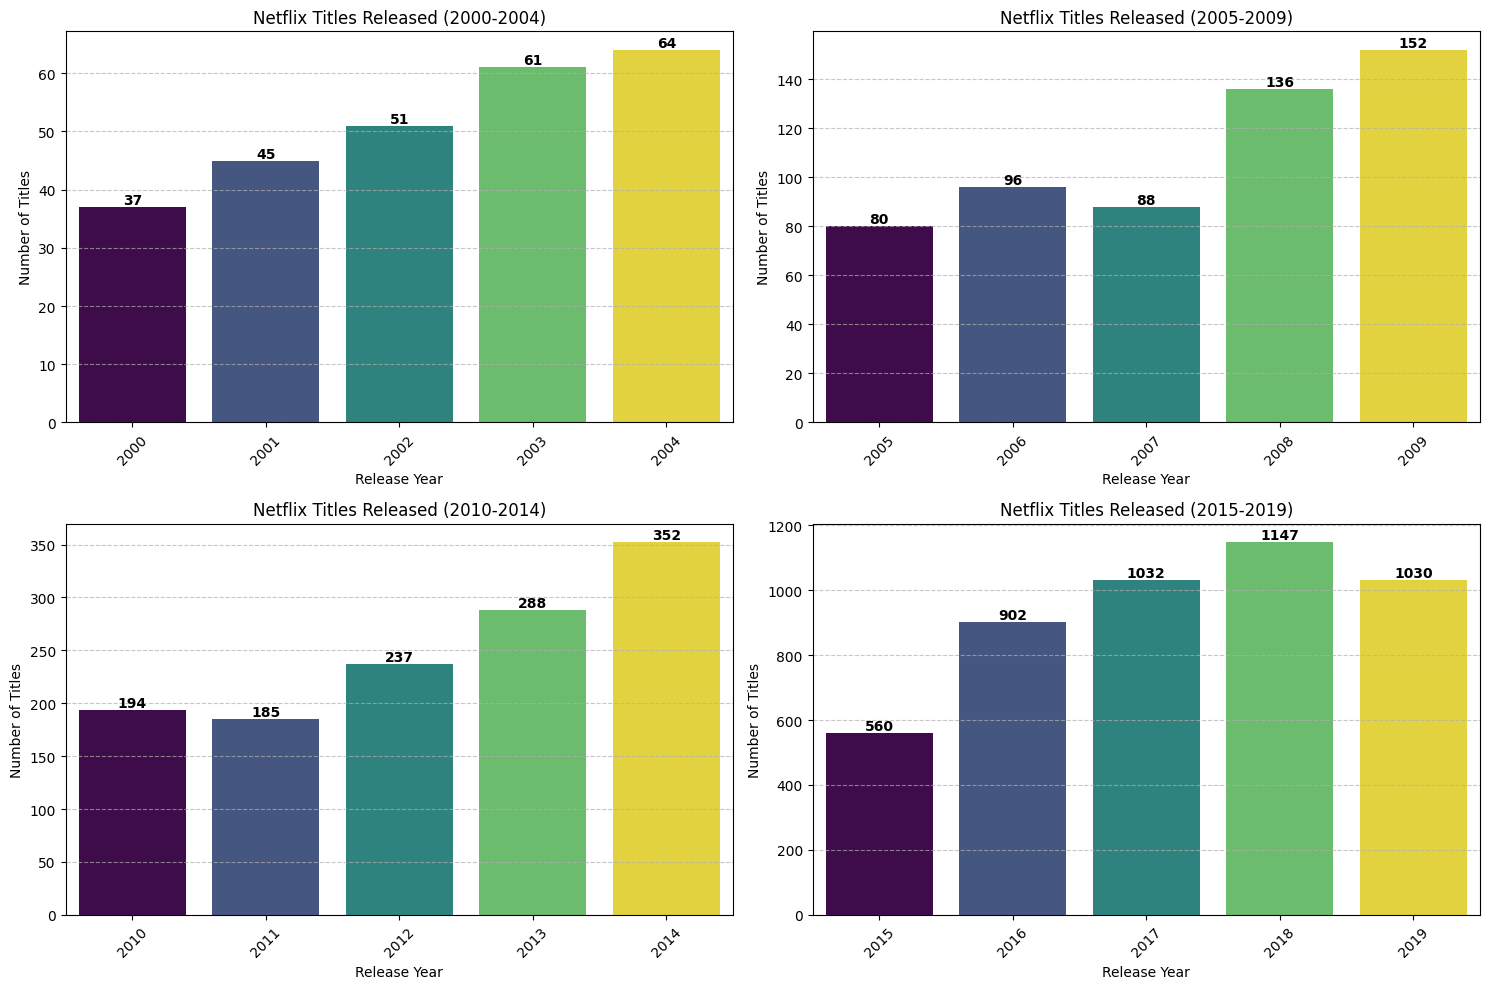

In [20]:
# Mengonversi release_year ke integer
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Filter tahun 2000–2020
df_filtered = df[(df['release_year'] >= 2000) & (df['release_year'] <= 2020)]

# Rentang 5 tahun
year_ranges = [(2000, 2004), (2005, 2009), (2010, 2014), (2015, 2019)]

plt.figure(figsize=(15, 10))
for i, (start, end) in enumerate(year_ranges):
    plt.subplot(2, 2, i + 1)
    df_subset = df_filtered[(df_filtered['release_year'] >= start) & (df_filtered['release_year'] <= end)]
    release_counts = df_subset['release_year'].value_counts().sort_index()

    ax = sns.barplot(
        x=release_counts.index,
        y=release_counts.values,
        hue=release_counts.index,
        palette='viridis',
        dodge=False,
        legend=False
    )

    # Label pada tiap bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.xlabel("Release Year")
    plt.ylabel("Number of Titles")
    plt.title(f"Netflix Titles Released ({start}-{end})")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


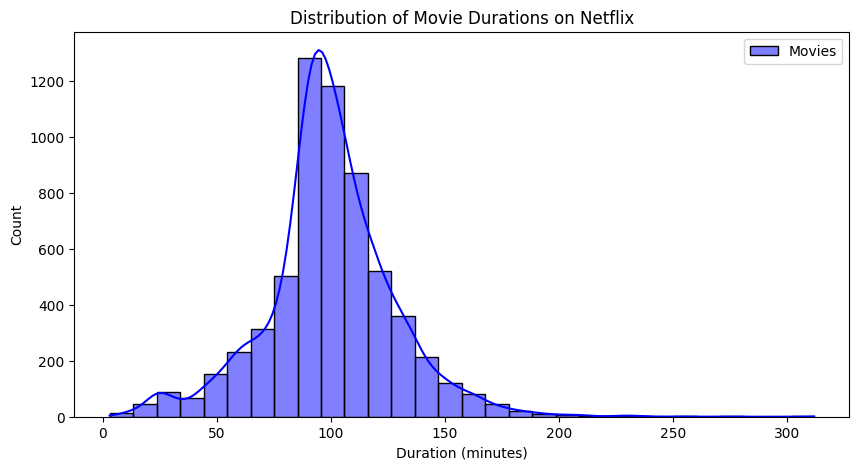

In [21]:
# Data preprocessing
df = df.dropna(subset=['duration'])  # Hapus nilai NaN pada durasi
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)  # Ambil angka dari durasi

# Pisahkan antara Film dan TV Show
df_movies = df[df['type'] == 'Movie']
df_tv_shows = df[df['type'] == 'TV Show']

# Visualisasi distribusi durasi
plt.figure(figsize=(10, 5))
sns.histplot(df_movies['duration'], bins=30, kde=True, color='blue', label='Movies')
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.title("Distribution of Movie Durations on Netflix")
plt.legend()
plt.show()